In [1]:
%cd ..

/volatile/home/Zaccharie/workspace/fastmri-reproducible-benchmark


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import glob

import h5py
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

from fourier import FFT2
from wavelets import WaveletDecimated, WaveletUndecimated


                 .|'''|       /.\      '||'''|,
                 ||          // \\      ||   ||
'||''|, '||  ||` `|'''|,    //...\\     ||...|'
 ||  ||  `|..||   .   ||   //     \\    ||
 ||..|'      ||   |...|' .//       \\. .||
 ||       ,  |'
.||        ''

Package version: 0.0.3

License: CeCILL-B

Authors: 

Antoine Grigis <antoine.grigis@cea.fr>
Samuel Farrens <samuel.farrens@cea.fr>
Jean-Luc Starck <jl.stark@cea.fr>
Philippe Ciuciu <philippe.ciuciu@cea.fr>

Dependencies: 

scipy          : >=0.18.0  - required | 1.3.0     installed
numpy          : >=1.11.0  - required | 1.16.4    installed
matplotlib     : >=2.0.0   - required | 3.1.0     installed
future         : >=0.16.0  - required | 0.17.1    installed
astropy        : ==2.0.8   - required | 2.0.8     installed
nibabel        : >=2.1.0   - required | 2.4.1     installed
pyqtgraph      : >=0.10.0  - required | 0.10.0    installed
progressbar2   : >=3.34.3  - required | ?         installed
modopt         : >=1.1.5   - requi

In [3]:
fourier_op = FFT2(np.array([1]))

In [4]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['image.cmap'] = 'gray'

In [5]:
val_path = '/media/Zaccharie/UHRes/singlecoil_val/'
filenames = glob.glob(val_path + '*')

def from_file_to_mask_and_kspace(filename):
    h5_obj = h5py.File(filename)
    image = h5_obj['reconstruction_esc'][()]
    kspace = h5_obj['kspace'][()]
    return image, kspace

file_0 = filenames[5]
images,  kspaces = from_file_to_mask_and_kspace(file_0)

slice_selected = 10
kspace = kspaces[slice_selected]
image = images[slice_selected]

print(kspace.shape)

print(image.shape)

(640, 368)
(320, 320)


In [6]:
im_full = fourier_op.adj_op(kspace)

In [7]:
nb_scales = 4
wavelet_id = 24
linear_op = WaveletUndecimated(
    nb_scale=nb_scales,
    wavelet_id=wavelet_id,
    set_norm=1.1,
    coarse=False,
)

In [8]:
%%time
wav_coefs = linear_op.op(im_full)

CPU times: user 715 ms, sys: 261 ms, total: 976 ms
Wall time: 1.09 s


In [9]:
for wav_coef in wav_coefs:
    print(wav_coef.shape)
    print(np.linalg.norm(wav_coef) / (kspace.shape[0] * kspace.shape[1]))
    

(640, 640)
1.1724669256736716e-08
(640, 640)
1.2530407507793611e-08
(640, 640)
1.1229734775402974e-08
(640, 640)
9.322641371110634e-09
(640, 640)
8.011811219433514e-09
(640, 640)
6.641057886600747e-09
(640, 640)
1.3362302162016008e-08
(640, 640)
6.486092821180966e-09
(640, 640)
5.170038475070251e-09


<IPython.core.display.Javascript object>


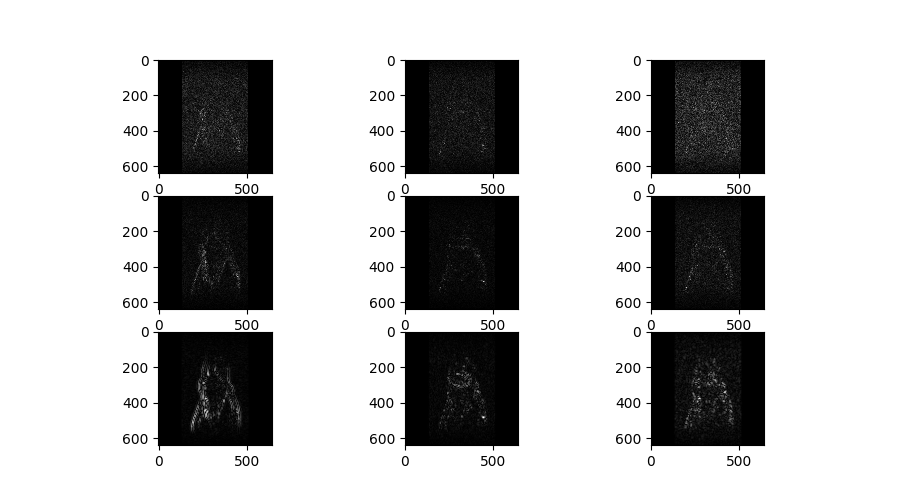

In [10]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(np.abs(wav_coefs[3*i + j]))

<IPython.core.display.Javascript object>


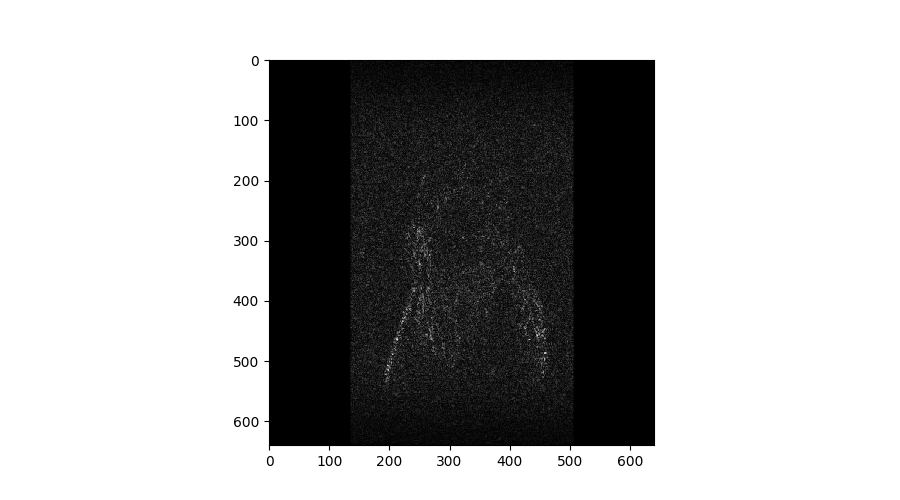

(640, 640)


In [11]:
plt.figure()
print(wav_coefs[0].shape)
plt.imshow(np.abs(wav_coefs[0]))

<IPython.core.display.Javascript object>


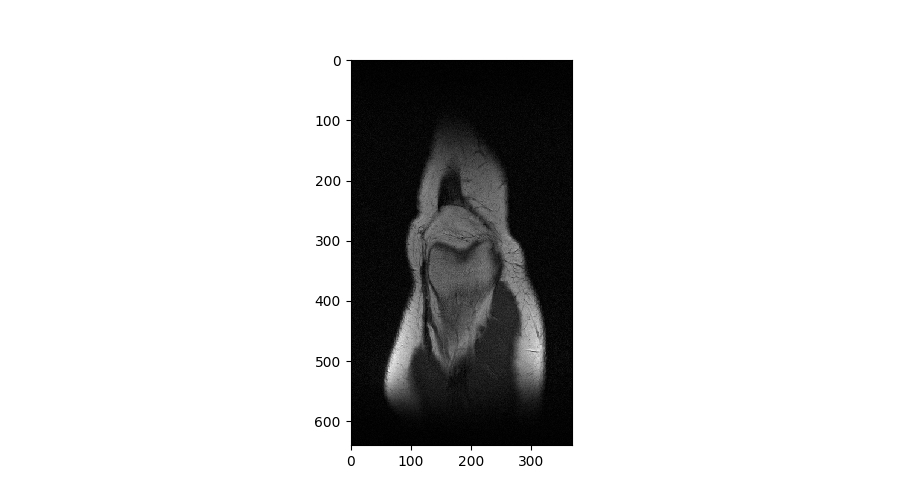

In [12]:
plt.figure()
plt.imshow(np.abs(im_full))